## Linear Regression

Here, I have analyzed an e-commerce company’s data from where I would have to decide whether to focus their efforts on their mobile app experience or their website experience.

Import section

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

Get Data

In [45]:
df = pd.read_csv("Ecommerce Customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [46]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

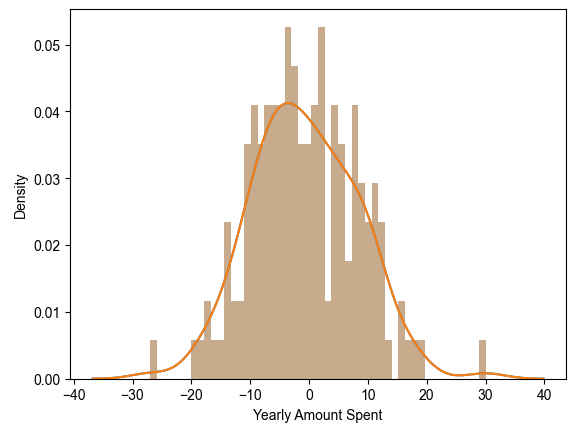

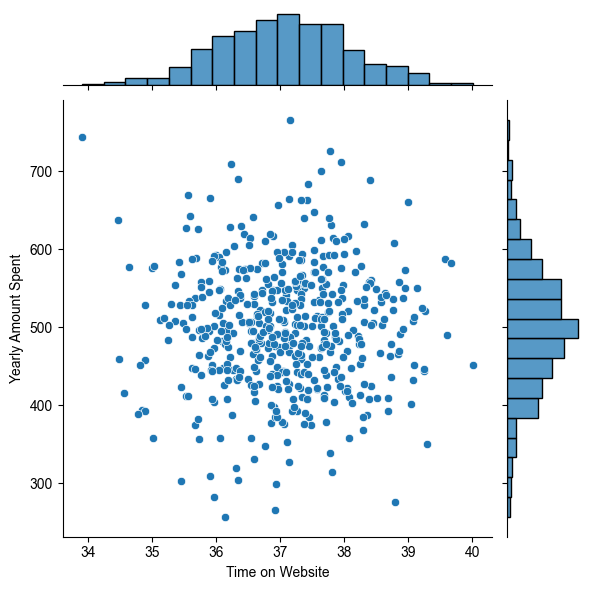

In [47]:
# More time on site, more money spent.
sns.jointplot(df,x='Time on Website',y='Yearly Amount Spent')
sns.set_style('whitegrid')

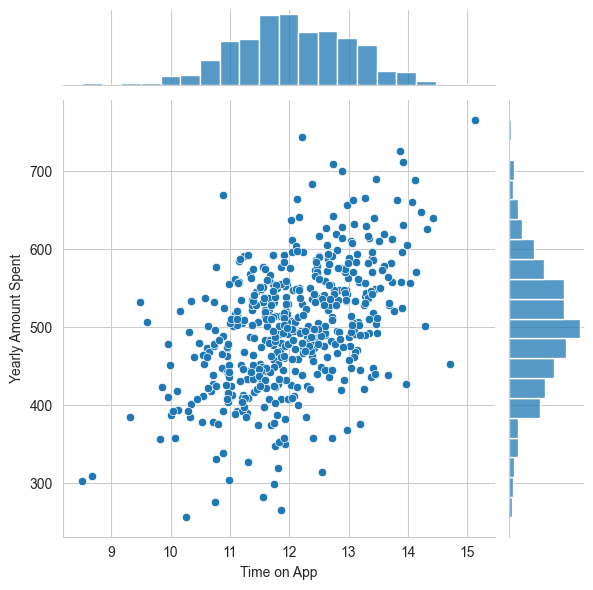

In [48]:
sns.jointplot(df,x='Time on App',y='Yearly Amount Spent')

We can see that there is more correlation between “Yearly Amount Spent” and “Time on App” than “Time on Website”. 

Let's check all the features

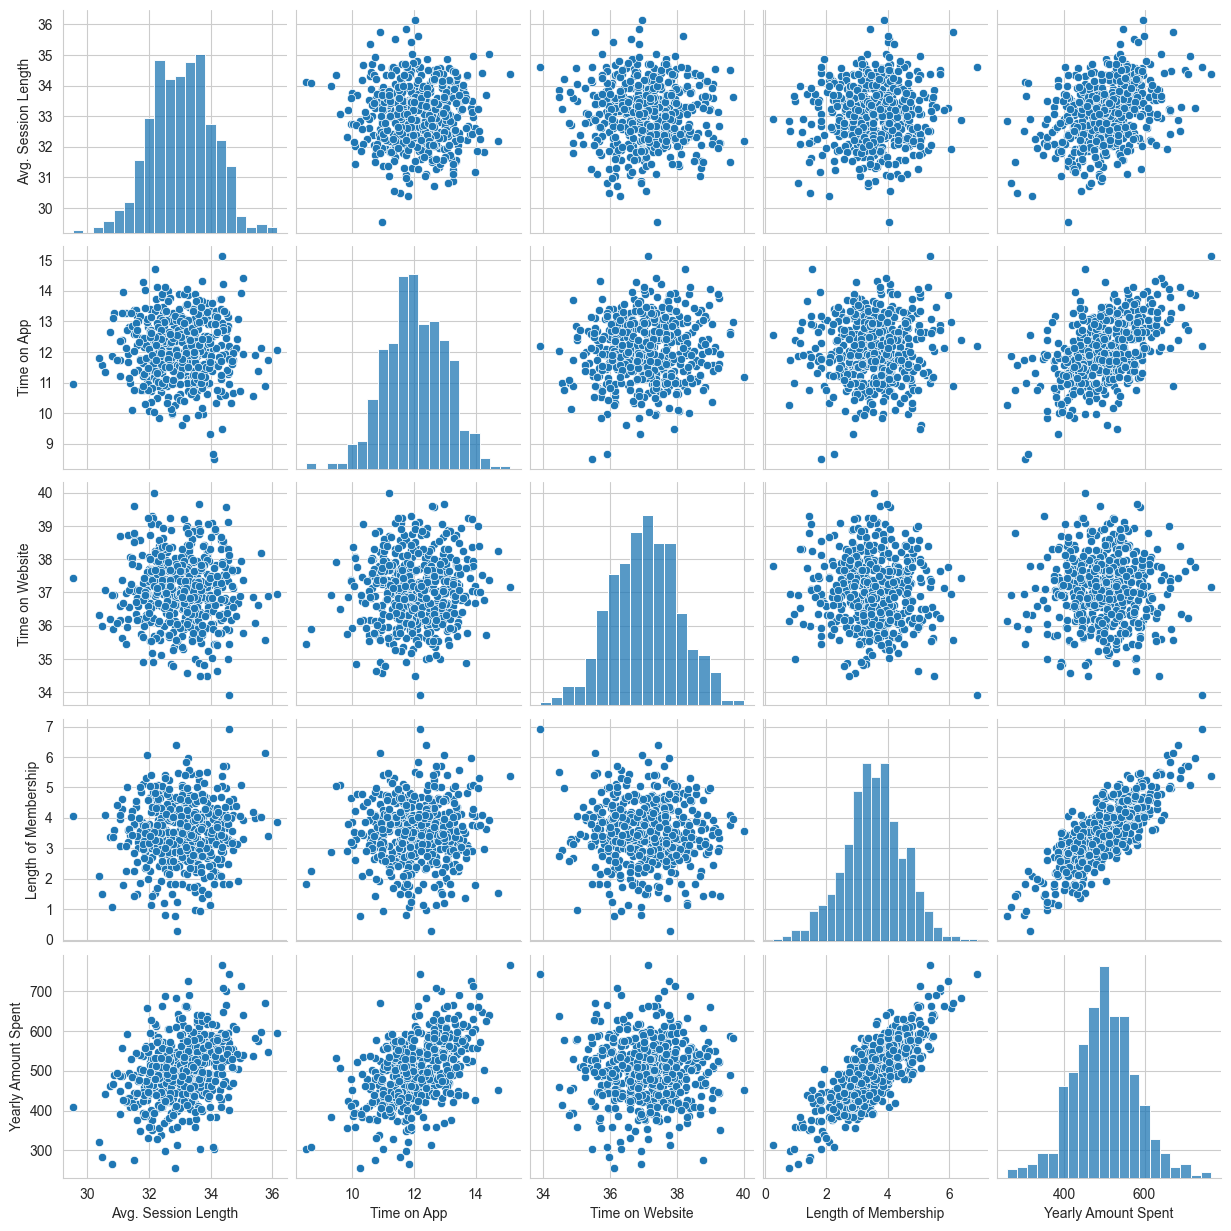

In [49]:
sns.pairplot(df)

We can see here, that there is more correlation between “Yearly Amount spent” and “Length of Membership” than “Time on App”.

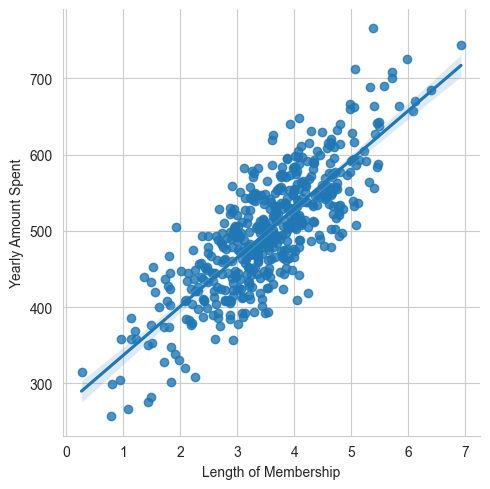

In [50]:
sns.lmplot(df,x="Length of Membership",y="Yearly Amount Spent")


## Training and Testing Data

In [51]:
from sklearn.model_selection import train_test_split

Dependent or resultant Variable y

In [52]:
y = df["Yearly Amount Spent"]
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [53]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

All the independent variables in X

In [54]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


Splitting the data into training and test data sets. 

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)


Importing Linear Regression Model

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lm = LinearRegression()

Fit the training data in the Linear Regression Model.  

In [58]:
lm.fit(X_train,y_train)

LinearRegression()

Get Coefficients

In [59]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

Get Prediction by independent test data set (X_test)

In [60]:
predictions = lm.predict(X_test)
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

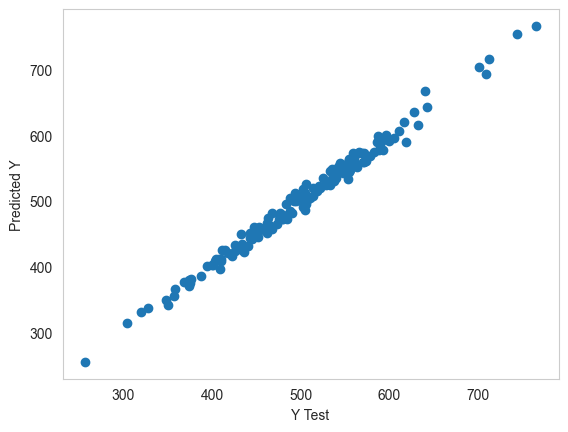

In [61]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()

Import metrics to check Error Amount

In [62]:
from sklearn import metrics
import numpy as np

In [63]:
print(f"MAE: {metrics.mean_absolute_error(y_test,predictions)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test,predictions))}")

MAE: 7.228148653430826
RMSE: 8.933815066978624


We can see, there is not much error.

Let's quickly explore the residuals to make sure everything was okay with our data. 

C:\Users\fnaim\AppData\Local\Temp\ipykernel_15412\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


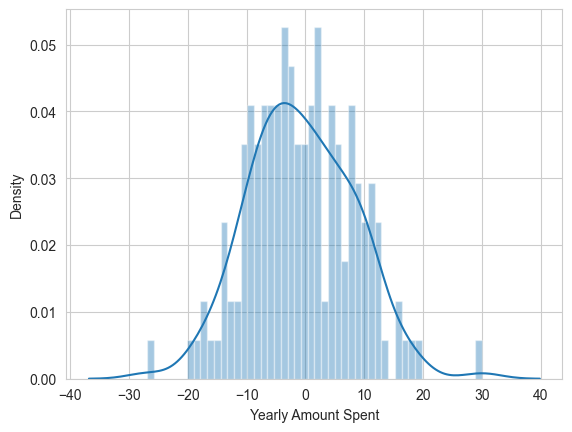

In [64]:
sns.distplot((y_test-predictions),bins=50);

Create new data frame with coefficient

In [66]:
new_df = pd.DataFrame(lm.coef_,X.columns)
new_df.columns = ["Coefficients"]
new_df

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Conclusion
There are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!

Now, we can check the correlation between “Length of Membership” with “Time on App” and “TIme on Website”. 

In [68]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [72]:
y_dependent_var = df["Length of Membership"]
X_independent_var = df[['Avg. Session Length', 'Time on App',
       'Time on Website','Yearly Amount Spent']]

In [74]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_independent_var,y_dependent_var,test_size=0.3,random_state=101)

In [76]:
lm2 = LinearRegression()

In [78]:
lm2.fit(X2_train,y2_train)

LinearRegression()

In [81]:
lm2.coef_

array([-0.41091056, -0.61049615, -0.00458261,  0.01584931])

In [80]:
prediction2 = lm2.predict(X2_test)

Text(0, 0.5, 'Predicted2 Y')

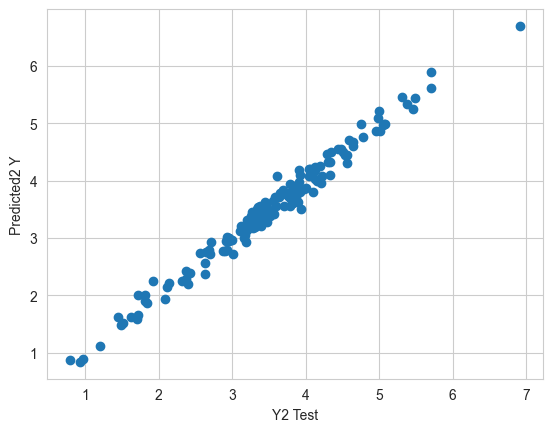

In [83]:
plt.scatter(y2_test,prediction2)
plt.xlabel('Y2 Test')
plt.ylabel('Predicted2 Y')

In [84]:
print('MAE:', metrics.mean_absolute_error(y2_test, prediction2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, prediction2)))

MAE: 0.11466540492513223
RMSE: 0.14156584586284568


C:\Users\fnaim\AppData\Local\Temp\ipykernel_15412\1004903197.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y2_test-prediction2),bins=50);


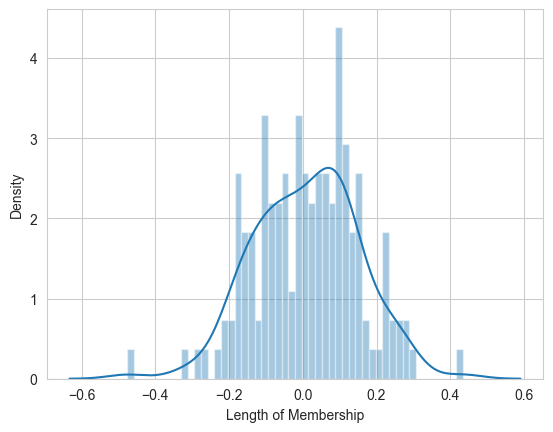

In [85]:
sns.distplot((y2_test-prediction2),bins=50);

In [88]:
coeffecients = pd.DataFrame(lm2.coef_,X_independent_var.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,-0.410911
Time on App,-0.610496
Time on Website,-0.004583
Yearly Amount Spent,0.015849
